In [1]:
import pandas as pd

# Load the dataset
file_path = 'mushroom.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [2]:
# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Display summary statistics
print(df.describe(include='all'))

# Check the unique values in each column
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

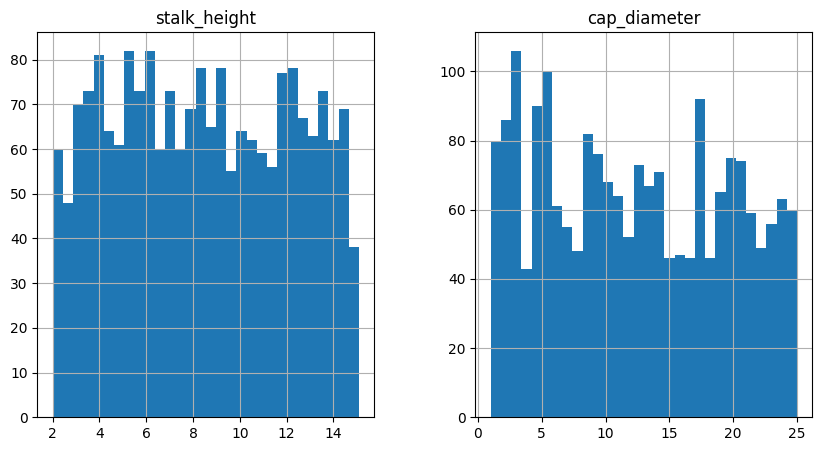

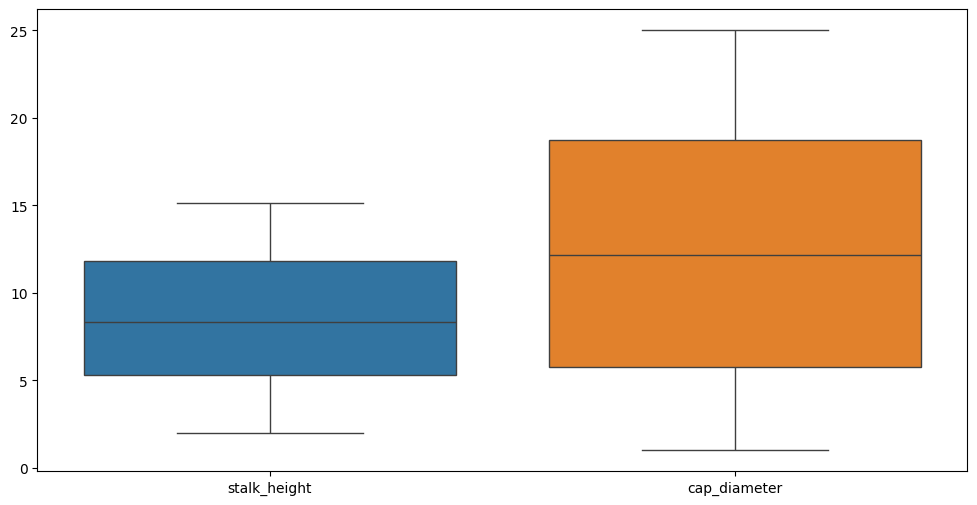

<Figure size 1200x600 with 0 Axes>

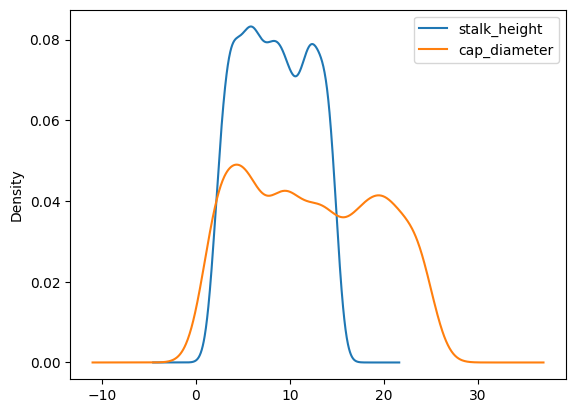

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of numeric features
df[['stalk_height', 'cap_diameter']].hist(bins=30, figsize=(10, 5))
plt.show()

# Box plots to understand distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['stalk_height', 'cap_diameter']])
plt.show()

# Density plots
plt.figure(figsize=(12, 6))
df[['stalk_height', 'cap_diameter']].plot(kind='density')
plt.show()


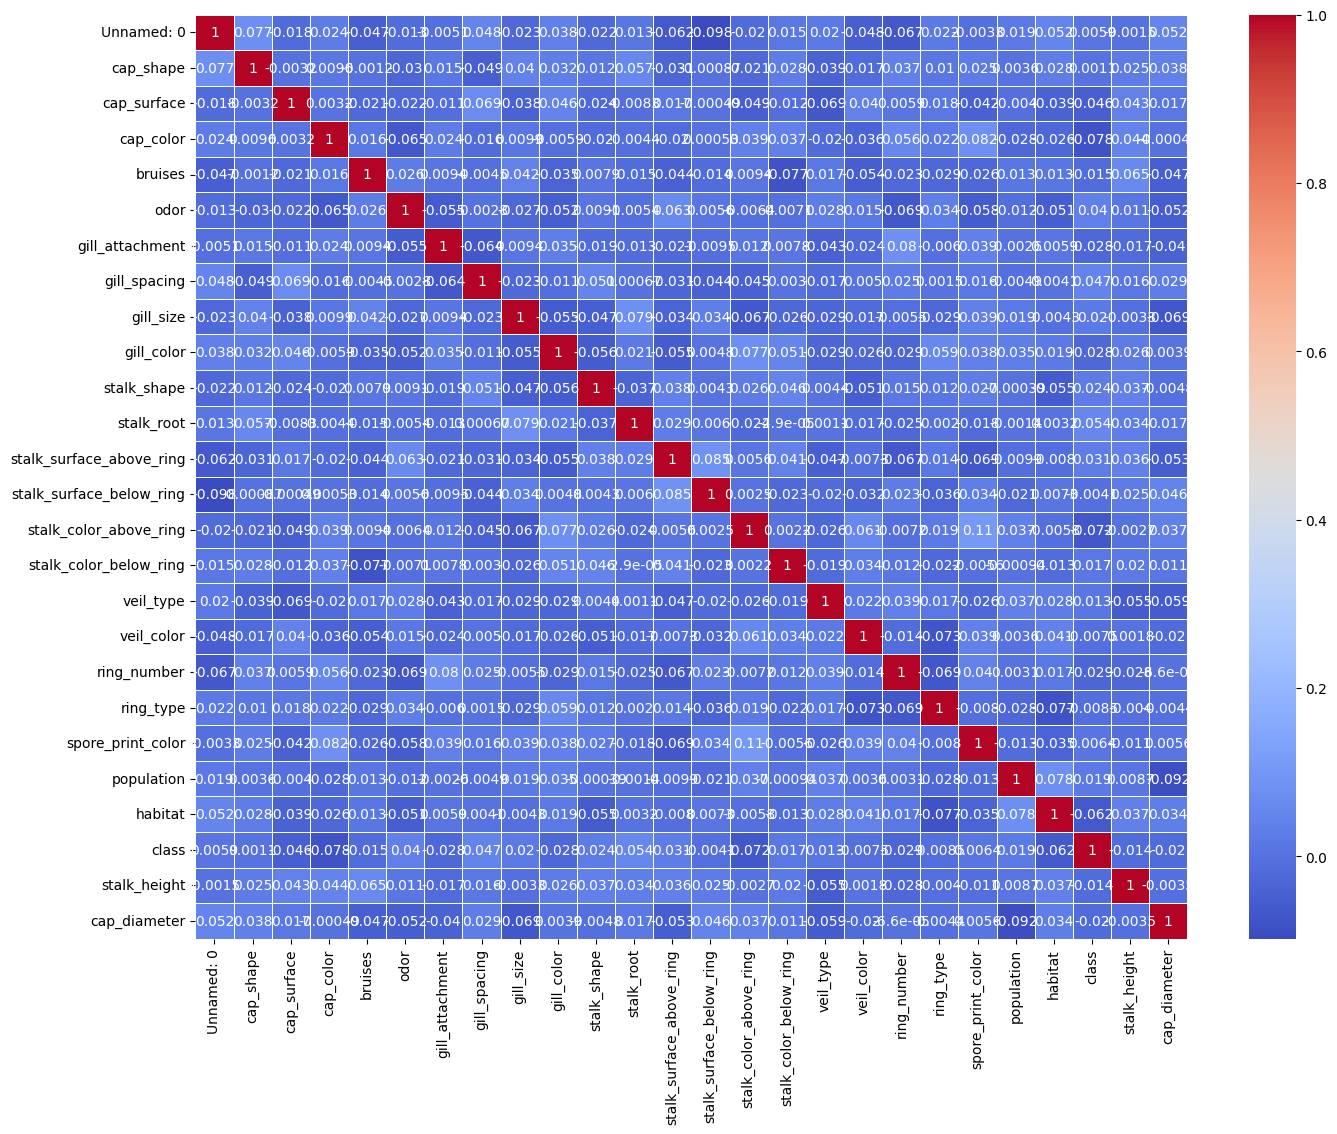

Unnamed: 0                  0.005902
cap_shape                   0.001140
cap_surface                -0.046409
cap_color                  -0.078029
bruises                    -0.015498
odor                        0.039536
gill_attachment            -0.028194
gill_spacing                0.046505
gill_size                   0.019858
gill_color                 -0.028083
stalk_shape                 0.024023
stalk_root                  0.054233
stalk_surface_above_ring    0.031007
stalk_surface_below_ring   -0.004139
stalk_color_above_ring     -0.071585
stalk_color_below_ring      0.016777
veil_type                   0.013094
veil_color                 -0.007517
ring_number                -0.029246
ring_type                  -0.008467
spore_print_color           0.006375
population                  0.019405
habitat                    -0.061998
class                       1.000000
stalk_height               -0.013655
cap_diameter               -0.019707
Name: class, dtype: float64


In [4]:
# Convert categorical variables to numerical codes for correlation analysis
df_encoded = df.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Investigate specific feature correlations
print(correlation_matrix['class'])


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split the dataset into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1600, 25)
X_test shape: (400, 25)
y_train shape: (1600,)
y_test shape: (400,)


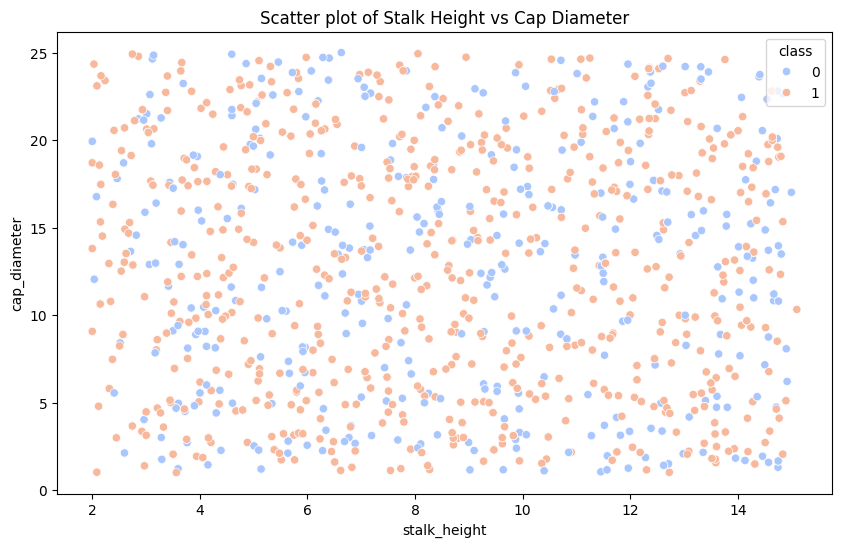

<Figure size 1200x1000 with 0 Axes>

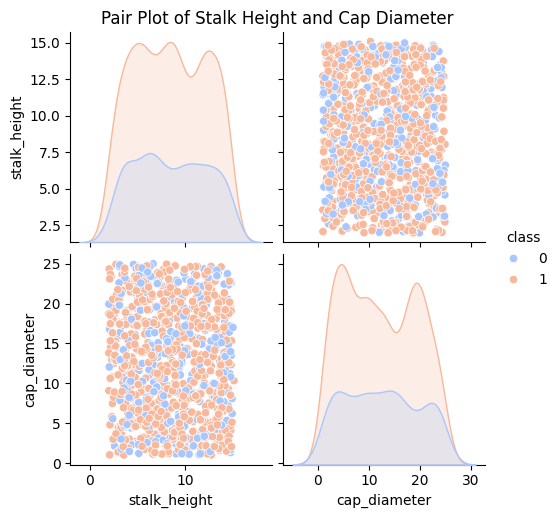

<ipython-input-6-5c9fed19abfe>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='coolwarm')


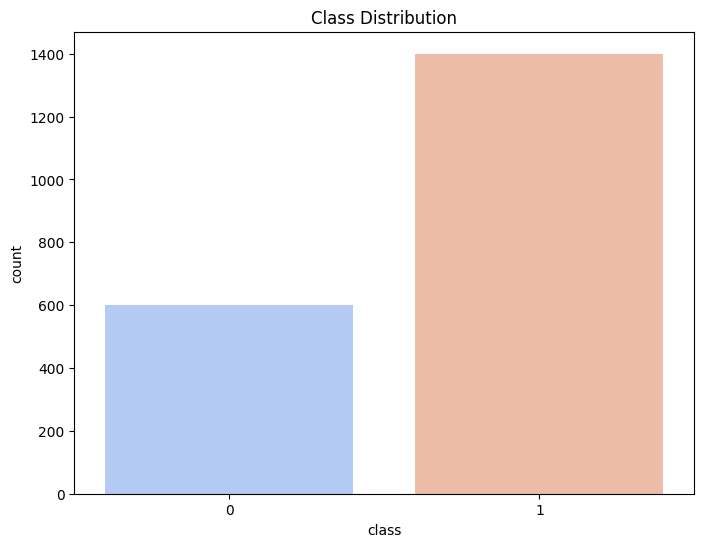

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of two numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stalk_height', y='cap_diameter', hue='class', palette='coolwarm')
plt.title('Scatter plot of Stalk Height vs Cap Diameter')
plt.show()

# Pair plot of numerical features
plt.figure(figsize=(12, 10))
sns.pairplot(df, vars=['stalk_height', 'cap_diameter'], hue='class', palette='coolwarm')
plt.suptitle('Pair Plot of Stalk Height and Cap Diameter', y=1.02)
plt.show()

# Visualize class distributions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class', palette='coolwarm')
plt.title('Class Distribution')
plt.show()


In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Implement a basic SVM classifier
svm_classifier = svm.SVC()

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate model performance using appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print the classification report for detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1 Score: 0.8006

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
file_path = 'mushroom.csv'
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split the dataset into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a basic SVM classifier
svm_classifier = svm.SVC()

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate model performance using appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print the classification report for detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1 Score: 0.8006

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


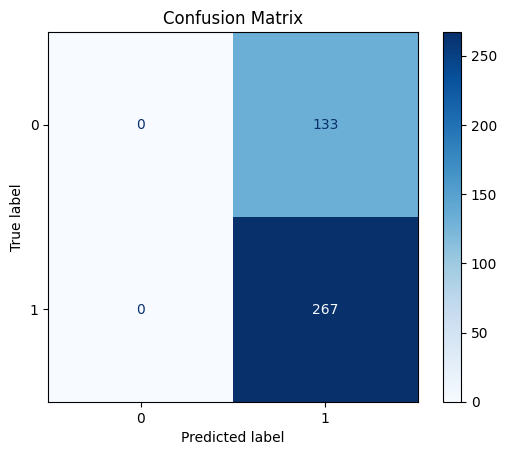

In [4]:
import matplotlib.pyplot as plt
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

# Define the parameter distribution
param_dist = {
    'C': expon(scale=100),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(svm.SVC(), param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Train the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluate the best model on the testing data
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"\nBest Model Accuracy: {accuracy_best:.4f}")
print(f"Best Model Precision: {precision_best:.4f}")
print(f"Best Model Recall: {recall_best:.4f}")
print(f"Best Model F1 Score: {f1_best:.4f}")

# Print the classification report for the best model
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))
